# Linear-Quadratic Dynamic Game

As shown in Proposition 2 in [1], the receding horizon open-loop Nash equilibria (NE) can be reformulated as a non-symmetric variational inequality. Specifically, consider a set of agents $\mathcal{N} = \{1,\dots,N\}$ characterizing a state vector $\mathbf{x}[t] \in \mathbb{R}^n$, whose (linear) dynamics is described as

$$
\begin{equation}
    \mathbf{x}[t+1] = \mathbf{A}\mathbf{x}[t] + \sum_{i \in \mathcal{N}} \mathbf{B}_i \mathbf{u}_i[t]
\end{equation}
$$

for $t = 1, \dots, T$. Each agent $i$ selfishly tries to choose $\mathbf{u}_i[t] \in \mathbb{R}^m$ in order to minimize the following cost function

$$
\begin{equation}
    J_i(\mathbf{u}_i|\mathbf{x}_0, \mathbf{u}_{-i}) = \frac{1}{2}\sum_{t=0}^{T-1} \|\mathbf{x}[t|\mathbf{x}_0, \mathbf{u}]\|^2_{\mathbf{Q}_i} + \|\mathbf{u}_i[t] \|^2_{\mathbf{R}_i}
\end{equation}
$$

for some $0 \preceq \mathbf{Q}_i \in \mathbb{R}^{n \times n}$ and $0 \prec \mathbf{R}_i \in \mathbb{R}^{m \times m}$, with $\mathbf{u}_{-i} = \text{col}(\mathbf{u}_j)_{j \in \mathcal{N}\setminus \{i\}}$ and $\mathbf{u}_j = \text{col}(\mathbf{u}_j[t])_{t=1}^T$. Moreover, $\mathbf{u} = \text{col}(\mathbf{u}_i)_{i \in \mathcal{N}}$. The set of feasible inputs, for each agent $i \in \mathcal{N}$, is $\mathcal{U}_i(\mathbf{x}_0,\mathbf{u}_{-i}) := \{\mathbf{u}_i \in \mathbb{R}^{mT} : \mathbf{u}_i[t] \in \mathcal{U}_i(\mathbf{u}_{-i}[t]), \ \forall t = 0,\dots,T-1; \ \mathbf{x}[t|\mathbf{x}_0, \mathbf{u}] \in \mathcal{X}, \ \forall t = 1,\dots,T\}$, where $\mathcal{X} \in \mathbb{R}^n$ is the set of feasible system states. Finally, $\mathcal{U}(\mathbf{x}_0) = \{\mathbf{u} \in \mathbb{R}^{mTN}: \mathbf{u}_i \in \mathcal{U}(\mathbf{x}_0,\mathbf{u}_{-i}), \ \forall i \in \mathcal{N}\}$. 
Following Definition 1 in [1], the sequence of input $\mathbf{u}^*_i \in \mathcal{U}_i(\mathbf{x}_0,\mathbf{u}_{-i})$, for all $i \in \mathcal{N}$, characterizes an open-loop NE iff

$$
\begin{equation}
    J(\mathbf{u}^*_i|\mathbf{x}_0,\mathbf{u}^*_{-i}) \leq \inf_{\mathbf{u}_i \in \mathcal{U}_i(\mathbf{x}_0, \mathbf{u}^*_{-i})}\left\{ J(\mathbf{u}^*_i|\mathbf{x}_0,\mathbf{u}_{-i}) \right\}
\end{equation}
$$

which is satisfied by the fixed-point of the best response mapping of each agent, defined as

$$
\begin{equation}
    \label{eq:best_response}
    \mathbf{u}^*_i = \underset{ {\mathbf{u}_i \in \mathcal{U}(\mathbf{x}_0,\mathbf{u}^*_{-i})} }{ \text{argmin} } J_i(\mathbf{u}_i|\mathbf{x}_0, \mathbf{u}^*_{-i}), \quad \forall i \in \mathcal{N}
\end{equation}
$$

Proposition 2 in [1] states that any solution of the canonical VI is a solution for $\eqref{eq:best_response}$ when $\mathcal{S} = \mathcal{U}(\mathbf{x}_0)$ and $F : \mathbb{R}^{mTN} \to \mathbb{R}^{mTN}$, defined as

$$
\begin{equation}
    F(\mathbf{u}) = \text{col}(\mathbf{G}^\top_i \bar{\mathbf{Q}}_i)_{i \in \mathcal{N}} (\text{row}(\mathbf{G}_i)_{i \in \mathcal{N}}\mathbf{u} + \mathbf{H} \mathbf{x}_0) +
    \text{blkdiag}(\mathbf{I}_T \otimes \mathbf{R}_i)_{i \in \mathcal{N}} \mathbf{u}
\end{equation}
$$

where, for all $i \in \mathcal{N}$, $\bar{\mathbf{Q}}_i = \text{blkdiag}(\mathbf{I}_{T-1} \otimes \mathbf{Q}_i, \mathbf{P}_i)$, $\mathbf{G}_i = \mathbf{e}^\top_{1,T} \otimes \text{col}(\mathbf{A}^t_i \mathbf{B}_i)_{t=0}^{T-1} + \mathbf{I}_T \otimes \mathbf{B}_i$ and $\mathbf{H} = \text{col}(\mathbf{A}^t)_{t = 1}^T$. Matrix $\mathbf{P}_i$ results from the open-loop NE feedback synthesis as discussed in [Equation 6] [1].

In [1]:
import numpy as np
import scipy as sp
import cvxpy as cp
import matplotlib.pyplot as plt

from monviso import VI

np.random.rand(2024)

make_positive_semidefinite = lambda X: X * X.T

n, m, N, T = 13, 4, 5, 3

A = np.random.rand(n, n)
B = [np.random.rand(n, m) for _ in range(N)]
Q = [make_positive_semidefinite(np.random.rand(n, n)) for _ in range(N)]
R = [make_positive_semidefinite(np.random.rand(m, m)) for _ in range(N)]
P = np.random.rand(n, n)
Q_bar = [sp.linalg.block_diag(np.kron(np.eye(T - 1), Q[i]), P) for i in range(N)]
G = [
    np.kron(np.eye(T), B[i])
    + np.kron(
        np.eye(1,T),
        np.vstack([np.linalg.matrix_power(A, t) @ B[i] for t in range(T)]),
    )
    for i in range(N)
]
H = np.vstack([np.linalg.matrix_power(A, t) for t in range(1, T + 1)])
x0 = np.random.rand(n)

Let's define the mapping $\mathbf{F}(\cdot)$ and the constraints set $\mathcal{S}$

In [3]:
# Define the mapping
F1 = np.vstack([G[i].T @ Q_bar[i] for i in range(N)])
F2 = np.hstack(G)
F3 = sp.linalg.block_diag(*[np.kron(np.eye(T), R[i]) for i in range(N)])
F = lambda u: F1 @ (F2 @ u + H @ x0) + F3 @ u
L = np.linalg.norm(F1 @ F2 + F3, 2) + 1

# Define a constraints set for the collective input
y = cp.Variable(m * T * N)
S = [y >= 0]

Then, we can initialize the VI and an initial solution

In [4]:
# Define the VI and the initial(s) points
lqg = VI(F, y=y, S=S)
u = np.random.rand(m * T * N)

We can use and compare different algorithms; e.g., fast optimistic gradient descent-ascent ([`fogda`](../../api/#explicit-fast-optimistic-gradient-descent-ascent)), golden ratio ([`graal`](../../api/#golden-ratio-algorithm)), adaptive golden ratio ([`agraal`](../../api/#adaptive-golden-ratio-algorithm))

In [11]:
GOLDEN_RATIO = 0.5 * (1 + np.sqrt(5))

max_iter = 50

residuals_fogda = np.zeros(max_iter)
residuals_graal = np.zeros(max_iter)
residuals_agraal = np.zeros(max_iter)

# Copy the same initial solution for the three methods
xk_fogda, x1k_fogda, y1k_fogda = np.copy(u), np.copy(u), np.copy(u)
xk_graal, yk_graal = np.copy(u), np.copy(u)
xk_agraal, x1k_agraal, yk_agraal, s1k_agraal, tk_agraal = \
    np.copy(u), np.random.rand(m * T * N), np.copy(u), GOLDEN_RATIO/(2*L), 1

for k in range(max_iter):
    # Fast Optimistic Gradient Descent Ascent 
    xk1_fogda, yk_fogda = lqg.fogda(xk_fogda, x1k_fogda, y1k_fogda, k, step_size=1/(4*L))
    residuals_fogda[k] = np.linalg.norm(xk1_fogda - xk_fogda)
    xk_fogda, x1k_fogda, y1k_fogda = xk1_fogda, xk_fogda, yk_fogda

    # Golden ratio algorithm
    xk1_graal, yk1_graal = lqg.graal(xk_graal, yk_graal, step_size=GOLDEN_RATIO/(2*L))
    residuals_graal[k] = np.linalg.norm(xk1_graal - xk_graal)
    xk_graal, yk_graal = xk1_graal, yk1_graal

    # Adaptive golden ratio algorithm
    xk1_agraal, yk1_agraal, sk_agraal, tk1_agraal = lqg.agraal(xk_agraal, x1k_agraal, yk_agraal, s1k_agraal, tk_agraal)
    residuals_agraal[k] = np.linalg.norm(xk1_agraal - xk_agraal)
    xk_agraal, x1k_agraal, yk_agraal, s1k_agraal, tk_agraal = xk1_agraal, xk_agraal, yk1_agraal, sk_agraal, tk1_agraal

The API docs have some detail on the [convention for naming iterative steps](../../api/#iterative-methods). Let's check out the residuals for each method. 

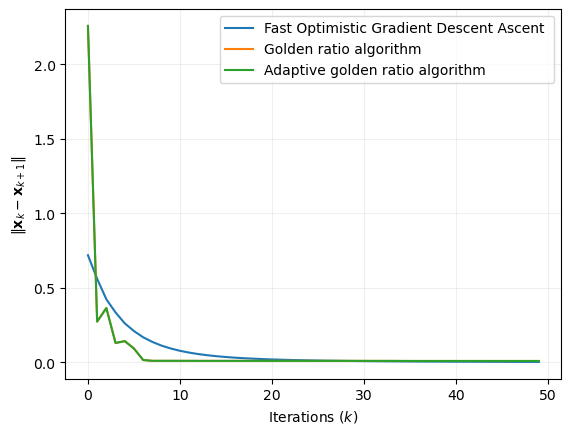

In [12]:
fig, ax = plt.subplots()

ax.plot(residuals_fogda, label="Fast Optimistic Gradient Descent Ascent ")
ax.plot(residuals_graal, label="Golden ratio algorithm")
ax.plot(residuals_agraal, label="Adaptive golden ratio algorithm")

ax.grid(True, alpha=0.2)
ax.set_xlabel("Iterations ($k$)")
ax.set_ylabel(r"$\|\mathbf{x}_k - \mathbf{x}_{k+1}\|$")
plt.legend()
plt.show()

## References
[1] Benenati, E., & Grammatico, S. (2024). Linear-Quadratic Dynamic Games as Receding-Horizon Variational Inequalities. arXiv preprint arXiv:2408.15703.